In [1]:
from matplotlib import pyplot
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense

In [2]:
X,Y=make_moons(n_samples=100,noise=0.2,random_state=1)
n_train=30
trainX,testX=X[:n_train,:],X[n_train:]
trainY,testY=Y[:n_train],Y[n_train:]

In [3]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(30, 2)
(30,)
(70, 2)
(70,)


In [4]:
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [7]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0873 - accuracy: 0.9667 - val_loss: 0.2908 - val_accuracy: 0.8857
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0870 - accuracy: 0.9667 - val_loss: 0.2904 - val_accuracy: 0.8857
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0868 - accuracy: 0.9667 - val_loss: 0.2900 - val_accuracy: 0.8857
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0865 - accuracy: 0.9667 - val_loss: 0.2895 - val_accuracy: 0.8857
Epoch 5/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0862 - accuracy: 0.9667 - val_loss: 0.2891 - val_accuracy: 0.8857
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0860 - accuracy: 0.9667 - val_loss: 0.2887 - val_accuracy: 0.8857
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0857 - accuracy: 0.9667 - val_loss: 0.2883 - val_accuracy: 0.8857
Epoch 8/100
1/1 [===

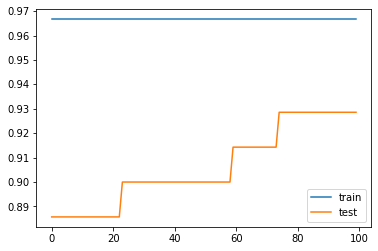

In [8]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

In [9]:
# After 75 epochs it started overfitting by giving same validation accuracy on the test data, so let us use regularization technique 

In [10]:
from keras.regularizers import l2

In [12]:
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 500)               1500      
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6859 - accuracy: 0.7000 - val_loss: 0.6863 - val_accuracy: 0.6000
Epoch 2/100
1/1 [==============================] - 0s 55ms/step - loss: 0.6699 - accuracy: 0.8000 - val_loss: 0.6759 - val_accuracy: 0.6571
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 0.6543 - accuracy: 0.8333 - val_loss: 0.6659 - val_accuracy: 0.6714
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6391 - accuracy: 0.8333 - val_loss: 0.6563 - val_accuracy: 0.6714
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6244 - accuracy: 0.8333 - val_loss: 0.6470 - val_accuracy: 0.6714
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6101 - accuracy: 0.8667 - val_loss: 0.6381 - val_accuracy: 0.6857
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.5961 - accuracy: 0.8667 - val_loss: 0.6295 - val_accuracy: 0.6857
Epoch 8/100
1/1 [=====

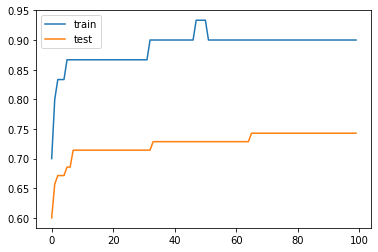

In [16]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

Lets apply l1 and l2 together to the model using below code

In [18]:
from keras.regularizers import l1_l2

In [19]:
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l1_l2(l1=0.001,l2=0.001)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               1500      
                                                                 
 dense_5 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7129 - accuracy: 0.8000 - val_loss: 0.7222 - val_accuracy: 0.6286
Epoch 2/100
1/1 [==============================] - 0s 65ms/step - loss: 0.6977 - accuracy: 0.8667 - val_loss: 0.7126 - val_accuracy: 0.6429
Epoch 3/100
1/1 [==============================] - 0s 49ms/step - loss: 0.6830 - accuracy: 0.8667 - val_loss: 0.7034 - val_accuracy: 0.6571
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 0.6686 - accuracy: 0.8667 - val_loss: 0.6945 - val_accuracy: 0.6857
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6547 - accuracy: 0.8333 - val_loss: 0.6860 - val_accuracy: 0.6857
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6412 - accuracy: 0.8333 - val_loss: 0.6778 - val_accuracy: 0.6857
Epoch 7/100
1/1 [==============================] - 0s 64ms/step - loss: 0.6280 - accuracy: 0.8333 - val_loss: 0.6700 - val_accuracy: 0.6857
Epoch 8/100
1/1 [=====

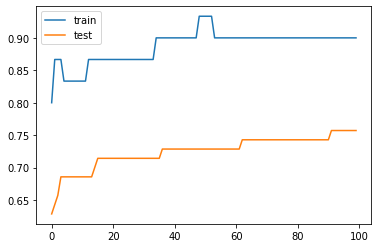

In [22]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()